In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option("display.max_columns",None)

In [2]:
df = pd.read_csv("Classified Data",index_col=0)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [8]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [9]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(scaled_features,df["TARGET CLASS"],test_size=0.30)

In [10]:
from sklearn.neighbors import KNeighborsClassifier


In [11]:
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [12]:
pred = KNN.predict(X_test)

In [13]:
from sklearn.metrics import classification_report , confusion_matrix

In [14]:
print(confusion_matrix(y_test,pred))

[[136  10]
 [ 13 141]]


In [15]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       146
           1       0.93      0.92      0.92       154

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [16]:
error_list = []
for i in range(1,40):
  KNN = KNeighborsClassifier(n_neighbors=i)
  KNN.fit(X_train,y_train)
  pred_i = KNN.predict(X_test)
  error_list.append(np.mean(pred_i != y_test))
error_list


[0.07666666666666666,
 0.09333333333333334,
 0.06666666666666667,
 0.06666666666666667,
 0.06333333333333334,
 0.07,
 0.06666666666666667,
 0.07,
 0.07,
 0.06,
 0.06333333333333334,
 0.06,
 0.06333333333333334,
 0.06,
 0.06666666666666667,
 0.06,
 0.06666666666666667,
 0.056666666666666664,
 0.06,
 0.05333333333333334,
 0.05333333333333334,
 0.05333333333333334,
 0.056666666666666664,
 0.056666666666666664,
 0.056666666666666664,
 0.05333333333333334,
 0.056666666666666664,
 0.056666666666666664,
 0.06333333333333334,
 0.056666666666666664,
 0.06,
 0.056666666666666664,
 0.06,
 0.056666666666666664,
 0.06333333333333334,
 0.05333333333333334,
 0.056666666666666664,
 0.05333333333333334,
 0.056666666666666664]

Text(0, 0.5, 'Error Rate')

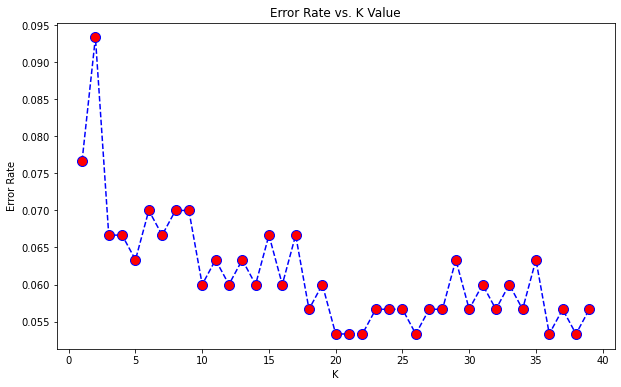

In [17]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_list,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [18]:
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_test,y_test)
Pred = KNN.predict(X_test)
print("when K=1")
print(confusion_matrix(y_test,Pred))
print(classification_report(y_test,Pred))

when K=1
[[146   0]
 [  0 154]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00       154

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [19]:
KNN = KNeighborsClassifier(n_neighbors=23)
KNN.fit(X_test,y_test)
Pred = KNN.predict(X_test)
print("when K=23")
print(confusion_matrix(y_test,Pred))
print(classification_report(y_test,Pred))

when K=1
[[134  12]
 [  5 149]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       146
           1       0.93      0.97      0.95       154

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [20]:
KNN = KNeighborsClassifier(n_neighbors=36)
KNN.fit(X_test,y_test)
Pred = KNN.predict(X_test)
print("when K=36")
print(confusion_matrix(y_test,Pred))
print(classification_report(y_test,Pred))

when K=36
[[134  12]
 [  6 148]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       146
           1       0.93      0.96      0.94       154

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

